In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.spatial import distance

# Exploratory Analysis

In [2]:
data = pd.read_csv('df.csv')

In [3]:
# Describes the Data Set
data.head()

,id,name,popularity,album,genres,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0XMl0fVTh3PyPlwyJTn33n,Be Someone (feat. Ray X Ben),62,"{'album_type': 'SINGLE', 'artists': [{'externa...","['brazilian edm', 'trance brasileiro', 'brazil...",0.711,0.722,2,-8.438,1,...,0.000013,0.6280,0.398,120.058,audio_features,spotify:track:0XMl0fVTh3PyPlwyJTn33n,https://api.spotify.com/v1/tracks/0XMl0fVTh3Py...,https://api.spotify.com/v1/audio-analysis/0XMl...,166005,4
1,4DYmJ19DhmxUe26QhANDYv,Folgado - Ao Vivo,57,"{'album_type': 'ALBUM', 'artists': [{'external...","['arrocha', 'sertanejo', 'sertanejo universita...",0.712,0.890,1,-3.792,0,...,0.000000,0.0726,0.569,163.848,audio_features,spotify:track:4DYmJ19DhmxUe26QhANDYv,https://api.spotify.com/v1/tracks/4DYmJ19DhmxU...,https://api.spotify.com/v1/audio-analysis/4DYm...,163902,4
2,1k1egPmIPWQ0J44PWgMDwA,Nois é Nois,73,"{'album_type': 'SINGLE', 'artists': [{'externa...","['trap brasileiro', 'trap brasileiro']",0.770,0.814,7,-4.903,1,...,0.000000,0.0916,0.618,148.001,audio_features,spotify:track:1k1egPmIPWQ0J44PWgMDwA,https://api.spotify.com/v1/tracks/1k1egPmIPWQ0...,https://api.spotify.com/v1/audio-analysis/1k1e...,120000,4
3,6Q8ljVgg7kR0R5v2aOXHlg,Sweet Dreams,60,"{'album_type': 'ALBUM', 'artists': [{'external...","['pop', 'r&b']",0.694,0.825,1,-5.986,1,...,0.000019,0.0618,0.788,121.949,audio_features,spotify:track:6Q8ljVgg7kR0R5v2aOXHlg,https://api.spotify.com/v1/tracks/6Q8ljVgg7kR0...,https://api.spotify.com/v1/audio-analysis/6Q8l...,208067,4
4,4iz9lGMjU1lXS51oPmUmTe,Homecoming,84,"{'album_type': 'ALBUM', 'artists': [{'external...","['chicago rap', 'hip hop', 'rap']",0.667,0.747,1,-7.059,1,...,0.000000,0.1150,0.918,86.917,audio_features,spotify:track:4iz9lGMjU1lXS51oPmUmTe,https://api.spotify.com/v1/tracks/4iz9lGMjU1lX...,https://api.spotify.com/v1/audio-analysis/4iz9...,203493,4


In [4]:
data.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,64.18200,0.703548,0.670402,5.538000,-6.128236,0.436000,0.137329,0.227214,0.014419,0.210775,0.514291,122.248920,203492.904000,3.992000
std,16.68213,0.129078,0.157024,3.541984,2.362872,0.496384,0.120917,0.226017,0.085005,0.184953,0.236684,25.131981,57307.554964,0.328865
min,0.00000,0.308000,0.264000,0.000000,-13.975000,0.000000,0.024900,0.000187,0.000000,0.019600,0.034500,60.019000,97960.000000,1.000000
25%,54.75000,0.617750,0.560000,2.000000,-7.479000,0.000000,0.048375,0.038025,0.000000,0.096650,0.334500,102.973000,165980.500000,4.000000
50%,67.00000,0.716000,0.679000,6.000000,-5.940000,0.000000,0.080450,0.149000,0.000000,0.132000,0.499500,123.052500,198344.000000,4.000000
75%,77.00000,0.800000,0.799250,8.000000,-4.484000,1.000000,0.196000,0.374250,0.000144,0.267500,0.709500,132.768000,230869.750000,4.000000
max,93.00000,0.975000,0.995000,11.000000,-0.681000,1.000000,0.650000,0.922000,0.882000,0.965000,0.979000,207.982000,547733.000000,5.000000


In [5]:
data['genres'].value_counts()

[]                                                                                                                21
['chicago rap', 'hip hop', 'rap']                                                                                  8
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']                                                  8
['funk bh', 'funk mtg']                                                                                            7
['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']                                                  6
                                                                                                                  ..
['edm', 'pop dance', 'pop house', 'uk dance', 'irish singer-songwriter', 'modern rock', 'pov: indie']              1
['brooklyn drill', 'nyc rap', 'brooklyn drill', 'new york drill', 'nyc rap']                                       1
['asian american hip hop', 'dance pop', 'pop rap', 'pop rock']  

 #### We discover that 28.2% of the music analysed don´t have any genre atributted to it, and many of the ones that do, have multiple values. So lets clean the values to see what are the most popular ones.

In [6]:
#Cleansd the data 
data['genres'] = data['genres'].fillna('')  # Replace NaN with empty string
data['genres'] = data['genres'].apply(lambda x: x if isinstance(x, str) else str(x))
data['genres'] = data['genres'].str.replace(r'[\[\]]', '', regex=True)

# Removes Duplicates and turns into rows
data['genres'] = data['genres'].map(lambda x: list(set(x.split(', '))) if x.strip() else [])

# Flattens the list
flat_list = [genre for sublist in data['genres'] for genre in sublist]

# Convert the flat list to a Series and count value occurrences
genre_series = pd.Series(flat_list)
genre_series.value_counts()


'rap'              136
'hip hop'           95
'pop'               78
'trap'              65
'pop rap'           63
                  ... 
'solo wave'          1
'chill baile'        1
'irish rock'         1
'trap latino'        1
'belgian dance'      1
Length: 322, dtype: int64

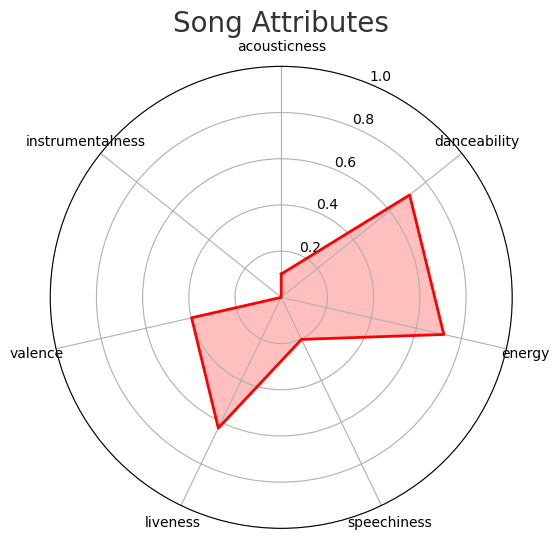

In [10]:
columns_to_plot = ['acousticness', 'danceability', 'energy', 'speechiness', 'liveness', 'valence']
values = data.loc[0, columns_to_plot].tolist()
values += values[:1]
num_vars = len(columns_to_plot)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to complete the loop
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), columns_to_plot)
ax.set_ylim(0, 1)

plt.title('Song Attributes', size=20, color='#333333')

plt.show()

### Overview of Audio Features:


#### In the graph provided, we gain a snapshot of the average values for each audio feature. The data reveals a vibrant collection of music, characterized by minimal instrumental presence and a focus on vocals.

#### It's noteworthy to distinguish that speechiness, representing the presence of spoken words in a track, doesn't directly correlate with instrumentalness. Particularly in the realm of music, the average speechiness typically falls within the range of 0.33 to 0.66. However, our dataset displays values below this range, indicating a tendency towards lower vocal content. This suggests a prevalence of genres such as electronic music, where instrumental elements often dominate the composition.

# A brief view of each audio feature

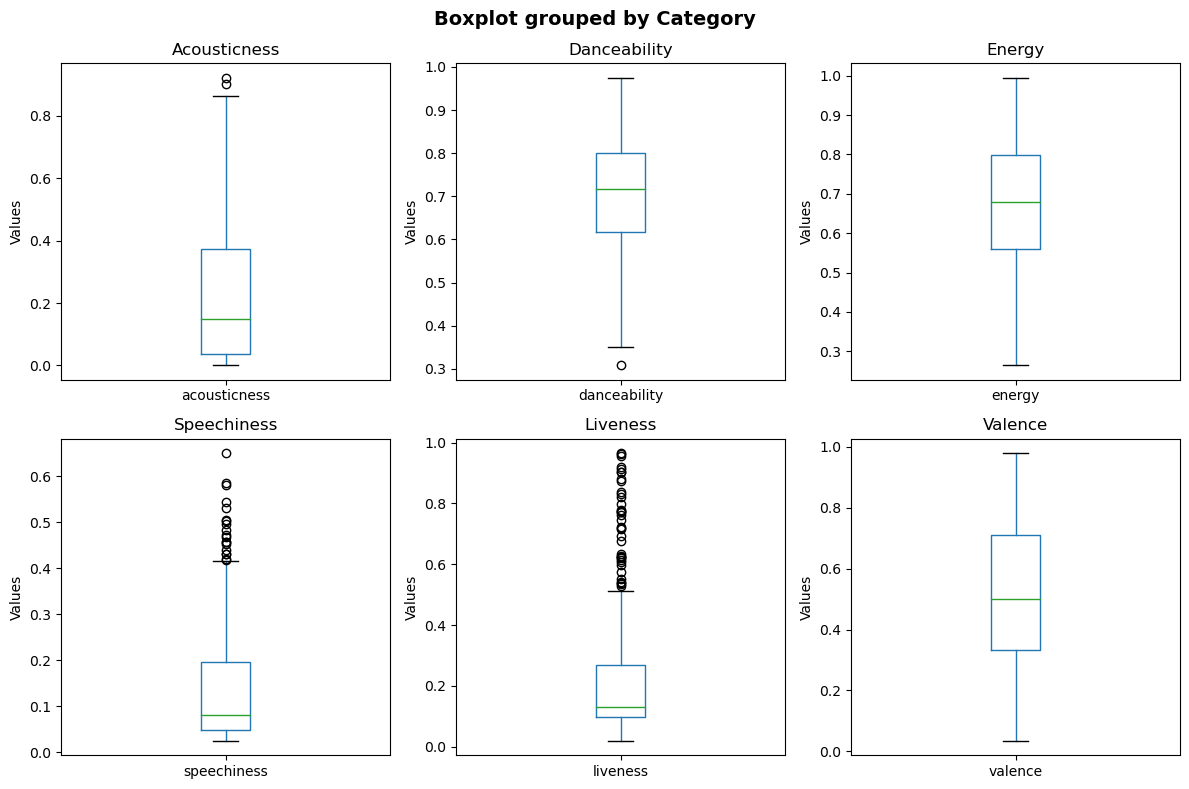

In [20]:
columns_to_plot = ['acousticness', 'danceability', 'energy', 'speechiness', 'liveness', 'valence']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    data.boxplot(column=col, ax=axs[i], grid=False)
    axs[i].set_title(col.capitalize())
    axs[i].set_ylabel('Values')

plt.suptitle('Boxplot grouped by Category', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

#### In examining the data, it's evident that liveness exhibits numerous outliers. This observation is consistent with the nature of the liveness feature, which indicates whether a piece of music was performed live or not. The wide range of values reflects the diversity inherent in live performances, contributing to the presence of outliers.

#### Similarly, speechiness displays a notable number of outliers. However, despite the presence of these outliers, both liveness and speechiness exhibit relatively compact boxplot areas. This phenomenon underscores the variability within these features while also highlighting the concentration of data points within a defined range.



In [22]:
data.sort_values(by = 'speechiness',ascending=False).head(10)

,id,name,popularity,album,genres,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
135,6ekV6MGnPTuCOnjB4VcWGc,Dead Or Alive,54,"{'album_type': 'SINGLE', 'artists': [{'externa...","['underground hip hop', 'canadian hip hop', 'c...",0.456,0.793,5,-5.569,1,...,0.0,0.1690,0.707,205.348,audio_features,spotify:track:6ekV6MGnPTuCOnjB4VcWGc,https://api.spotify.com/v1/tracks/6ekV6MGnPTuC...,https://api.spotify.com/v1/audio-analysis/6ekV...,194947,4
299,4p55EkzkGnWmLYDiNXc14t,Bands,57,"{'album_type': 'ALBUM', 'artists': [{'external...","['underground hip hop', 'trap']",0.831,0.456,10,-10.778,1,...,0.0,0.0669,0.535,158.006,audio_features,spotify:track:4p55EkzkGnWmLYDiNXc14t,https://api.spotify.com/v1/tracks/4p55EkzkGnWm...,https://api.spotify.com/v1/audio-analysis/4p55...,98734,4
295,3Wypq2rlasi7mfYEhaln3C,Fake Sh!t (feat. NoCap),42,"{'album_type': 'ALBUM', 'artists': [{'external...","['atl trap', 'alabama rap', 'florida drill', '...",0.849,0.448,7,-10.003,0,...,0.0,0.0798,0.200,103.059,audio_features,spotify:track:3Wypq2rlasi7mfYEhaln3C,https://api.spotify.com/v1/tracks/3Wypq2rlasi7...,https://api.spotify.com/v1/audio-analysis/3Wyp...,210625,4
466,5tsaqgcjeZyEfLHO1DkISq,Chapei,48,"{'album_type': 'SINGLE', 'artists': [{'externa...",['brazilian hip hop'],0.631,0.522,7,-8.076,1,...,0.0,0.0992,0.496,91.428,audio_features,spotify:track:5tsaqgcjeZyEfLHO1DkISq,https://api.spotify.com/v1/tracks/5tsaqgcjeZyE...,https://api.spotify.com/v1/audio-analysis/5tsa...,297391,4
240,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,81,"{'album_type': 'ALBUM', 'artists': [{'external...","['canadian pop', 'hip hop', 'atl trap', 'rap',...",0.963,0.346,5,-9.309,0,...,0.0,0.1080,0.562,119.957,audio_features,spotify:track:6vN77lE9LK6HP2DewaN6HZ,https://api.spotify.com/v1/tracks/6vN77lE9LK6H...,https://api.spotify.com/v1/audio-analysis/6vN7...,142273,4
267,5hTpBe8h35rJ67eAWHQsJx,Caroline,71,"{'album_type': 'ALBUM', 'artists': [{'external...","['portland hip hop', 'pop rap', 'rap', 'underg...",0.940,0.335,5,-10.179,0,...,0.0,0.2620,0.707,120.040,audio_features,spotify:track:5hTpBe8h35rJ67eAWHQsJx,https://api.spotify.com/v1/tracks/5hTpBe8h35rJ...,https://api.spotify.com/v1/audio-analysis/5hTp...,209640,4
231,4IO8X9W69dIQe0EC5ALXhq,Immortal,72,"{'album_type': 'SINGLE', 'artists': [{'externa...","['rap', 'atl hip hop', 'hip hop']",0.741,0.870,6,-3.494,0,...,0.0,0.1140,0.663,184.194,audio_features,spotify:track:4IO8X9W69dIQe0EC5ALXhq,https://api.spotify.com/v1/tracks/4IO8X9W69dIQ...,https://api.spotify.com/v1/audio-analysis/4IO8...,254723,4
443,0vwOWwl785S9EU1wtbeLLJ,BookBag 2.0 (feat. Polo G),67,"{'album_type': 'ALBUM', 'artists': [{'external...","['rap', 'chicago rap', 'philly drill']",0.909,0.541,8,-6.436,1,...,0.0,0.0942,0.823,135.106,audio_features,spotify:track:0vwOWwl785S9EU1wtbeLLJ,https://api.spotify.com/v1/tracks/0vwOWwl785S9...,https://api.spotify.com/v1/audio-analysis/0vwO...,171245,4
382,1AfNdxHdE4OLcnQUyC6j3i,Eterna Sacanagem,60,"{'album_type': 'SINGLE', 'artists': [{'externa...","['funk ostentacao', 'sertanejo universitario',...",0.558,0.675,8,-4.564,1,...,0.0,0.1060,0.769,92.678,audio_features,spotify:track:1AfNdxHdE4OLcnQUyC6j3i,https://api.spotify.com/v1/tracks/1AfNdxHdE4OL...,https://api.spotify.com/v1/audio-analysis/1AfN...,168800,5
496,1n5Rzk23vvIRHeIH3g4Fdc,Demi,45,"{'album_type': 'ALBUM', 'artists': [{'external...","['underground hip hop', 'trap']",0.808,0.613,1,-3.237,1,...,0.0,0.2610,0.302,156.978,audio_features,spotify:track:1n5Rzk23vvIRHeIH3g4Fdc,https://api.spotify.com/v1/tracks/1n5Rzk23vvIR...,https://api.spotify.com/v1/audio-analysis/1n5R...,98599,4


#### By analyzing the music with the highest frequency of spoken words, we observe a predominance of Brazilian trap and rap genres. This aligns cohesively with the elevated values of speechiness within these musical styles.

# Now lets see what makes me like a song better than others.

Based on Spotify, the audio features are classified in 3 different ways:
    
   **Mood** : Danceability, Valence, Tempo, Energy
   
   **Context** : Liveness, Acousticness
   
   **Properties** : Loudness, Speechiness, Instrumentality



### Firstly lets analyse the mood, since tempo is not important for us, lets make a 3d graph using the other 3 variables.

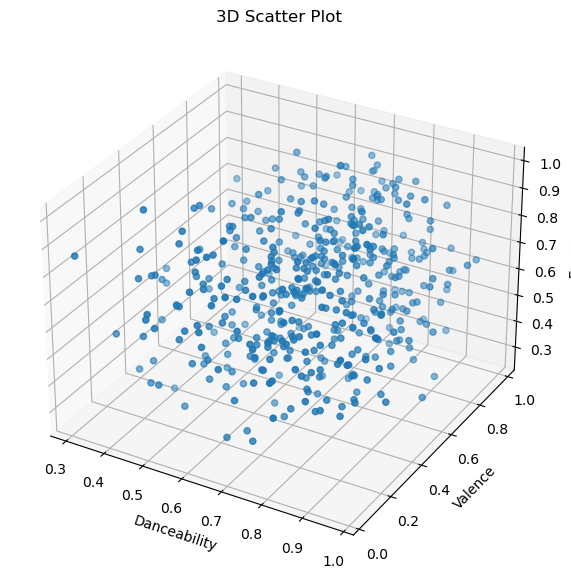

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = data['danceability']
y = data['valence']
z = data['energy']

scatter = ax.scatter(x, y, z)

ax.set_xlabel('Danceability')
ax.set_ylabel('Valence')
ax.set_zlabel('Energy')
ax.set_title('3D Scatter Plot')
plt.show()

#### This graph illustrates the scattered distribution of values across the variables. To gain further insights, let's plot them in two dimensions to explore potential correlations between each variable

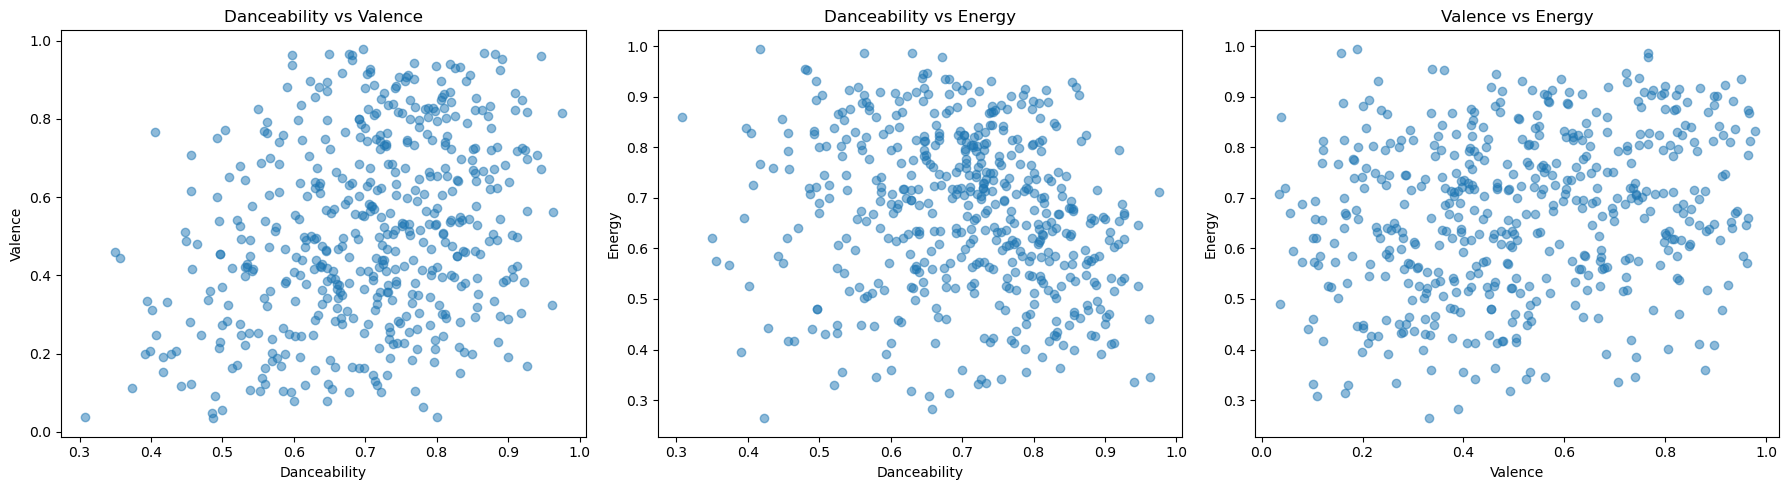

In [29]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)  
plt.scatter(data['danceability'], data['valence'], alpha=0.5)
plt.title('Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')

plt.subplot(1, 3, 2) 
plt.scatter(data['danceability'], data['energy'], alpha=0.5)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

plt.subplot(1, 3, 3) 
plt.scatter(data['valence'], data['energy'], alpha=0.5)
plt.title('Valence vs Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')

# Show plot
plt.tight_layout()
plt.show()

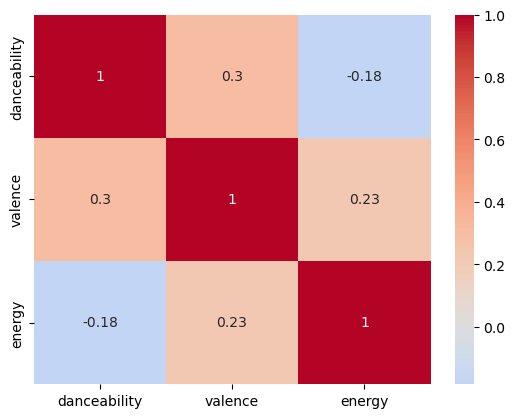

In [25]:
correlation_matrix_mood = data[['danceability', 'valence', 'energy']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

#### Upon examining the heatmap, we observe a correlation of 0.3 between valence and danceability. While this correlation exists, its magnitude is not substantial enough to draw definitive conclusions. Given the relatively low correlation values across the variables, it appears that there is a degree of randomness in how the variables interact with each other.

### Now, since we haven't discovered much analysing the mood features, let's look at the context features.

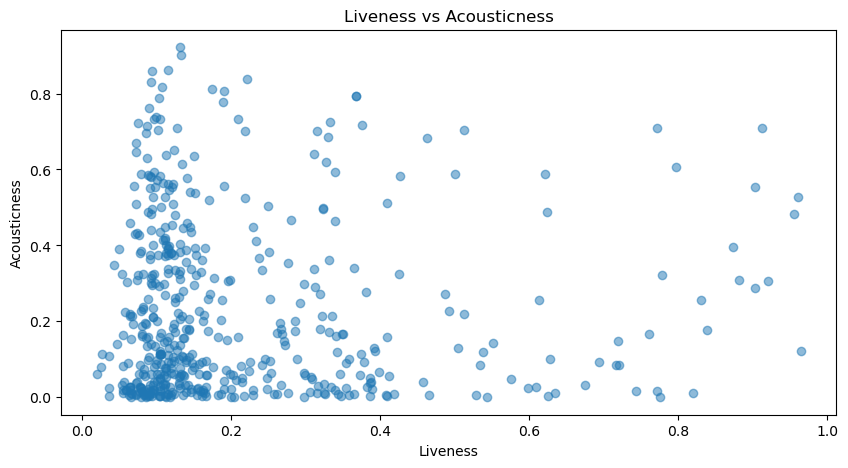

In [32]:
plt.figure(figsize=(10, 5))

plt.scatter(data['liveness'], data['acousticness'], alpha=0.5)
plt.title('Liveness vs Acousticness')
plt.xlabel('Liveness')
plt.ylabel('Acousticness')

plt.show()

In [31]:
correlation_context = data[['liveness','acousticness']].corr()
print(correlation_context)

              liveness  acousticness
liveness      1.000000      0.015483
acousticness  0.015483      1.000000


#### Like before, there seems to be no correlation between the values.

### Now for properties:

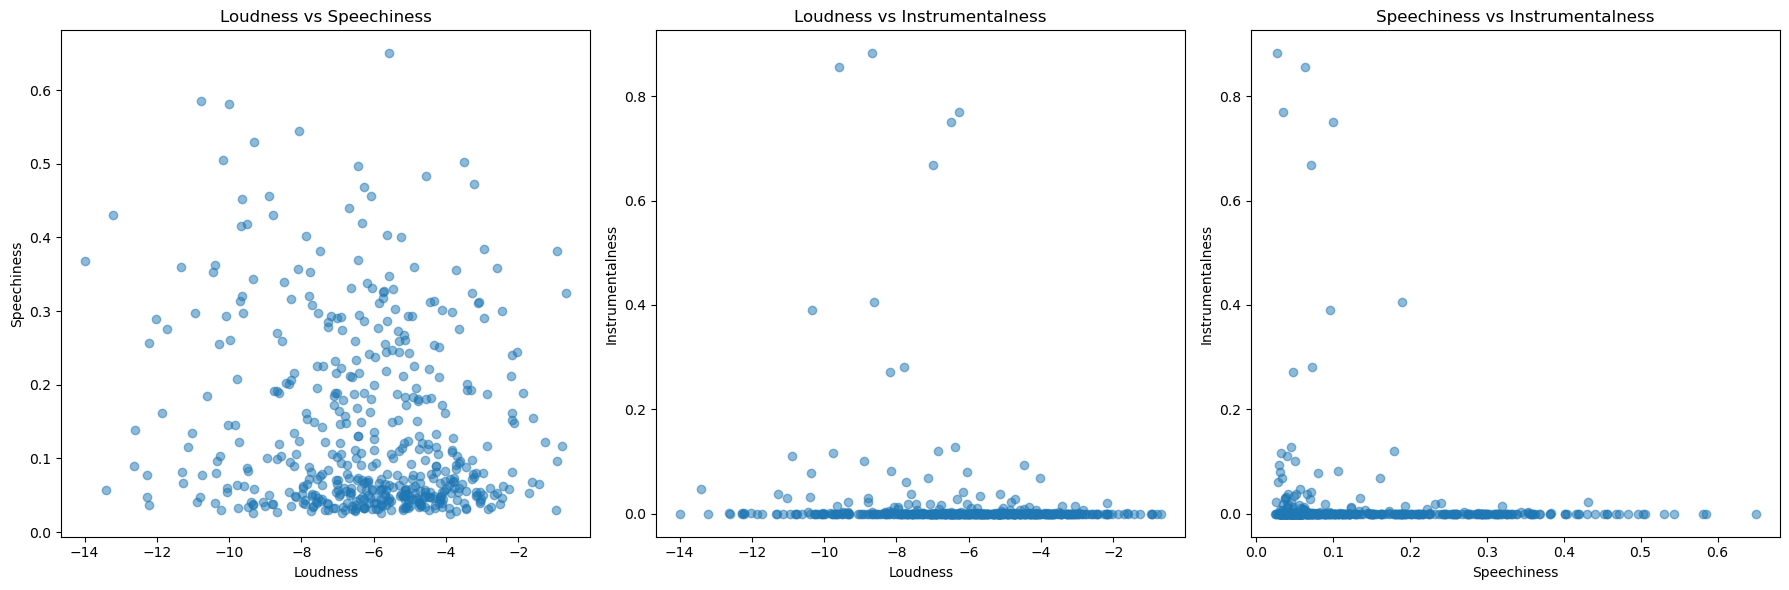

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  
plt.scatter(data['loudness'], data['speechiness'], alpha=0.5)
plt.title('Loudness vs Speechiness')
plt.xlabel('Loudness')
plt.ylabel('Speechiness')

plt.subplot(1, 3, 2) 
plt.scatter(data['loudness'], data['instrumentalness'], alpha=0.5)
plt.title('Loudness vs Instrumentalness')
plt.xlabel('Loudness')
plt.ylabel('Instrumentalness')

plt.subplot(1, 3, 3) 
plt.scatter(data['speechiness'], data['instrumentalness'], alpha=0.5)
plt.title('Speechiness vs Instrumentalness')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')

plt.tight_layout()
plt.show()

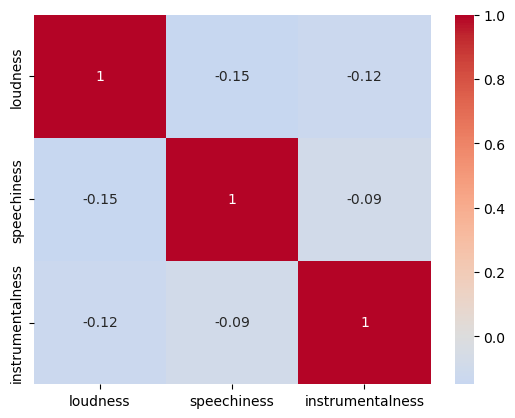

In [34]:
correlation_matrix_mood = data[['loudness', 'speechiness', 'instrumentalness']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

#### Similar to the previous observation, it appears that there is no significant correlation between the values. Although tracks with higher speechiness tend to be slightly less instrumental, this relationship lacks a strong correlation. It suggests that other factors may influence the instrumental nature of the tracks.

### Now, since we the only conclusion we had is that, inside each feature there isn't any dominant pattern linking the features, let's see if we can find any pattern when we compare all the features

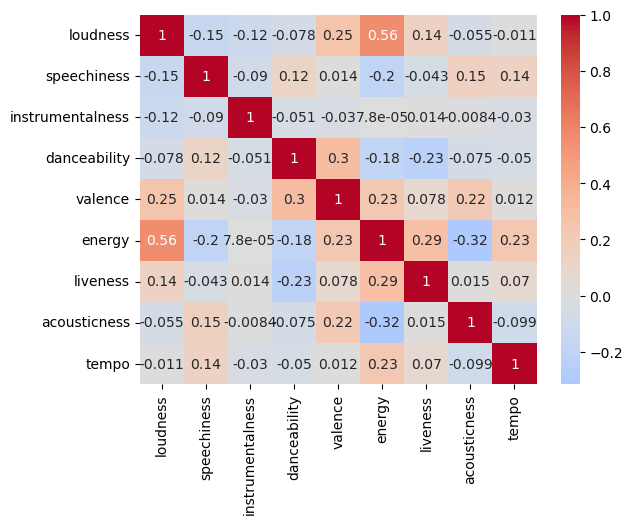

In [36]:
correlation_matrix_mood = data[['loudness', 'speechiness', 'instrumentalness','danceability', 'valence', 'energy','liveness','acousticness','tempo']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

#### An interesting finding emerges from our analysis: there exists a medium correlation between energy and loudness. This correlation aligns intuitively with our expectations, as higher energy levels in music often coincide with increased loudness. This relationship underscores the dynamic interplay between energy and volume within musical compositions.

# Exploring how similar are the songs in the dataframe

#### Cosine similarity is a measure used to determine the similarity between two vectors by calculating the cosine of the angle between them. It is particularly useful in high-dimensional spaces, as is common in text analysis and other types of data analytics involving multiple metrics or features.

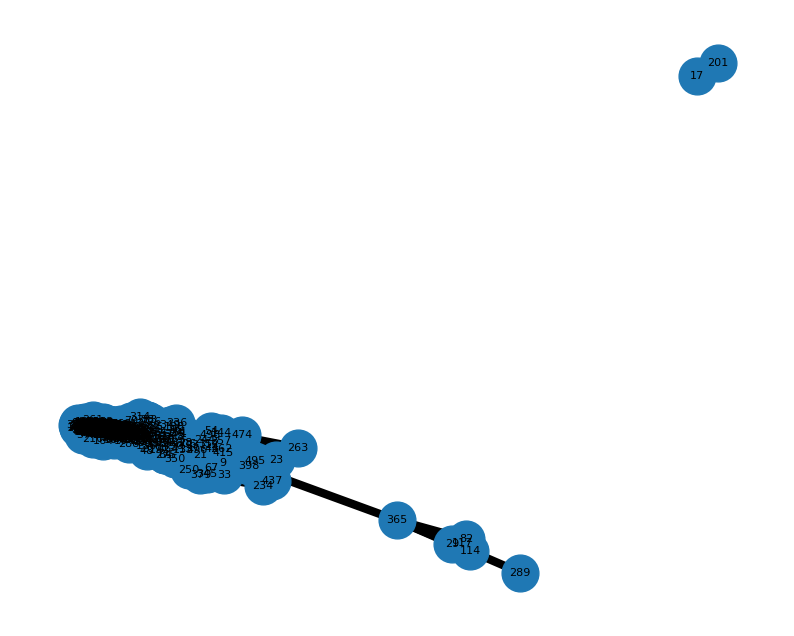

Number of nodes: 490
Number of edges: 66392


In [37]:
audio_features = ['loudness', 'speechiness', 'instrumentalness', 
                  'danceability', 'valence', 'energy', 'liveness', 'acousticness']

feature_data = data[audio_features]


cosine_sim_matrix = 1 - pd.DataFrame(
    distance.cdist(feature_data.values, feature_data.values, 'cosine'),
    index=data.index, columns=data.index
)

G = nx.Graph()

threshold = 0.99
for i in range(len(cosine_sim_matrix)):
    for j in range(i + 1, len(cosine_sim_matrix)):
        if cosine_sim_matrix.iloc[i, j] >= threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix.iloc[i, j])


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.axis('off')  
plt.show()


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


In [38]:
threshold = 0.99
connections_count = (cosine_sim_matrix > threshold).sum(axis=1)
max_connections_index = connections_count.idxmax()
song_with_most_connections = data.loc[max_connections_index, 'name']  # assuming 'id' is the column with song identifiers

print(f"The song with the most connections is: {song_with_most_connections} with {connections_count[max_connections_index]} connections.")

The song with the most connections is: Superhero (Heroes & Villains) [with Future & Chris Brown] with 399 connections.


## Conclusion:

#### While significant correlations between individual audio features are lacking, the diversity of points within each feature indicates a wide range of musical characteristics. Despite this diversity, a noteworthy observation emerges: the analyzed songs exhibit striking similarity, characterized by numerous connections between them. This suggests a cohesive musical landscape defined by shared traits and themes.